# import

In [4]:
import os
import sys
import numpy as np
import math
import pandas as pd
import re
import shutil
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm

os.chdir('../')
from src.utils import convertor_R, Rod
# from src.arrangement import make_arr

# make gjf

glide=a

In [9]:
R1_t=5.0;R2_t=0.6;heri=60.0
R3_t=-0.1;R3_p=-0.6;R3_t2=np.round(R3_t-R3_p,1)

##########ここだけいじる
Ra_i0=2.4;Rb_i0=0.2;R3_i0=11.6#vdwmin=2.5,0.3,11.62418694　ここでは0.2Å刻み
##########

maker_3=make_gjf()

In [11]:
for dRa_i0 in np.linspace(-0.2,0.2,3):
    Ra=np.round(Ra_i0+dRa_i0,1)
    for dRb_i0 in np.linspace(-0.2,0.2,3):
        Rb=np.round(Rb_i0+dRb_i0,1)
        for dR3_i0 in np.linspace(-0.6,-0.4,2):
            R3=np.round(R3_i0+dR3_i0,1)
#             maker_3.make_step3(R1_t=R1_t,R2_t=R2_t,heri=heri,
#                                R3_t=R3_t,R3_p=R3_p,
#                                Ra_i0=Ra, Rb_i0=Rb, R3_i0=R3,
#                                glide_mode='a',edge_mode='a',Z=1)
            maker_3.make_step3(R1_t=R1_t,R2_t=R2_t,heri=heri,
                               R3_t=R3_t2,R3_p=-R3_p,
                               Ra_i0=Ra, Rb_i0=-Rb, R3_i0=R3,
                               glide_mode='a',edge_mode='a',Z=2)            

glide=b

In [3]:
R1_t=5.0;R2_t=0.8;heri=58.0
R3_t=-0.3;R3_p=-0.7;R3_t2=np.round(R3_t-R3_p,1)

##########ここだけいじる
Ra_i0=0.0;Rb_i0=-2.6;R3_i0=12.0#11.9454
##########

maker_3=make_gjf()

In [8]:
for dRa_i0 in np.linspace(-0.4,0.4,5):
    Ra=np.round(Ra_i0+dRa_i0,1)
    for dRb_i0 in np.linspace(-0.2,0.2,3):
        Rb=np.round(Rb_i0+dRb_i0,1)
        for dR3_i0 in np.linspace(-0.6,-0.4,2):
            R3=np.round(R3_i0+dR3_i0,1)
            maker_3.make_step3(R1_t=R1_t,R2_t=R2_t,heri=heri,
                                R3_t=R3_t,R3_p=R3_p,
                                Ra_i0=Ra, Rb_i0=Rb, R3_i0=R3,
                                glide_mode='b',edge_mode='a',Z=1)
            maker_3.make_step3(R1_t=R1_t,R2_t=R2_t,heri=heri,
                               R3_t=-R3_t2,R3_p=R3_p,
                               Ra_i0=-Ra, Rb_i0=Rb, R3_i0=R3,
                               glide_mode='b',edge_mode='a',Z=2)

## ③フォルダ小分け

In [9]:
maker_3.move_to_4mkdir_step3(glide='b',edge='a',sep=15)

## ④実行ファイル作成

In [10]:
maker_3.make_exe_step3(glide_mode='b',edge_mode='a')

FFのmin可視化　Ztype

In [55]:
os.getcwd()

'/Users/jigenji/Working/interaction/mono-C9-BTBT'

In [72]:
df_groupby_minFF.iloc[df_groupby_minFF['FF'].argmin()]

R3t       1.200000
R3p       0.000000
R1        5.000000
R2        0.700000
heri     58.000000
phi1   -155.000000
phi2    -85.000000
FF     -161.098931
Name: 1332, dtype: float64

In [96]:
plt.xticks

0.5

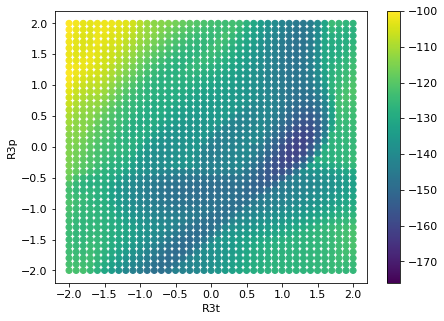

In [109]:
df_FF_localmin = pd.read_csv('/Users/jigenji/Working/interaction/mono-C9-BTBT/FF/FF_localmin.csv')
df_groupby_minFF = df_FF_localmin[df_FF_localmin['glide']=='a'].groupby(['R3t','R3p'],as_index=False).min('FF')
plt.rcParams['figure.figsize'] = 7,5
plt.rcParams['font.size'] = 11

plt.scatter(df_groupby_minFF['R3t'], df_groupby_minFF['R3p'], c=df_groupby_minFF['FF'],vmin=-176,vmax=-100)

plt.xlabel('R3t')
plt.ylabel('R3p')
plt.colorbar()
plt.show()

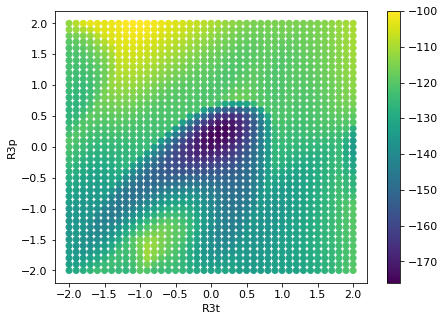

In [108]:
df_FF_localmin = pd.read_csv('/Users/jigenji/Working/interaction/mono-C9-BTBT/FF/FF_localmin.csv')
df_groupby_minFF = df_FF_localmin[df_FF_localmin['glide']=='b'].groupby(['R3t','R3p'],as_index=False).min('FF')
plt.rcParams['figure.figsize'] = 7,5
plt.rcParams['font.size'] = 11
plt.scatter(df_groupby_minFF['R3t'], df_groupby_minFF['R3p'], c=df_groupby_minFF['FF'],vmin=-176,vmax=-100)
plt.xlabel('R3t')
plt.ylabel('R3p')
plt.colorbar()
plt.show()

In [52]:
viewer=make_gjf()
viewer.view(R1_t=R1,R2_t=R2,heri=heri,phi1=phi1,phi2=phi2,R3_t=R3t,R3_p=R3p,torp='t',glide_mode=glide)
viewer.view(R1_t=5.0,R2_t=0.7,heri=58.0,phi1=0,phi2=135,R3_t=0.0,R3_p=0.0,torp='t',glide_mode='b')
